# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination - 

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

## Load Dataset

In [1]:
import pandas as pd

train_df = pd.read_csv('/Users/surajvamshi77/Downloads/midterm/Problem2/dataset/train.csv')
test_df = pd.read_csv('/Users/surajvamshi77/Downloads/midterm/Problem2/dataset/test.csv')

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1: Data Analysis (10 points)

Explore the data to find any relationship between the target variable and the input variables. 

Start with providing some descriptive statistics of the data with visualizations. 

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display the first few rows of the training dataset
print("Training Dataset:")
train_df.head()

Training Dataset:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2254502445,20140530T000000,3,1.00,1220.0,4800,1.0,0,0.0,3,...,1220,0,1901,0,98122,47.6101,-122.307,1200,4800,3.85
1,126059019,20150316T000000,4,2.50,3170.0,94855,1.0,0,0.0,4,...,1910,1260,1978,0,98072,47.7648,-122.112,2590,65340,7.99
2,8825900020,20140811T000000,5,3.00,2710.0,4200,2.0,0,0.0,3,...,1890,820,1919,2014,98115,47.6754,-122.307,2150,4200,9.25
3,9465910380,20141024T000000,4,2.25,2850.0,7453,2.0,0,NaN,3,...,2850,0,1991,0,98072,47.7439,-122.174,2700,8468,5.40
4,7784400060,20150120T000000,3,2.50,2370.0,9000,1.0,0,3.0,4,...,1570,800,1952,0,98146,47.4922,-122.365,2120,9500,5.45


In [3]:
# Display the first few rows of the test dataset
print("Test Dataset:")
test_df.head()

Test Dataset:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1930300915,20140820T000000,3,1.00,1240.0,4800,1.0,0,0.0,3,7.0,800,440,1951,0,98103,47.6563,-122.353,1440,4800
1,8861000060,20141231T000000,3,1.00,1160.0,10732,1.0,0,0.0,3,7.0,1160,0,1953,0,98004,47.6391,-122.205,2390,13656
2,7701960720,20141017T000000,4,2.50,4200.0,35267,2.0,0,0.0,3,11.0,4200,0,1990,0,98077,47.7108,-122.071,3540,22234
3,7338401230,20140828T000000,3,1.75,1020.0,5000,1.0,0,0.0,5,NaN,1020,0,1954,0,98118,47.5332,-122.290,1360,5000
4,1022059161,20140613T000000,4,2.25,2630.0,39000,2.0,0,0.0,3,9.0,2630,0,1979,0,98042,47.4089,-122.149,2270,66647


## Analyzing train_df

In [4]:
#dataset information
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           18693 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    18857 non-null  float64
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           18478 non-null  float64
 9   condition      19451 non-null  int64  
 10  grade          18078 non-null  float64
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqft_l

In [5]:
#number of rows and columns in train_df
train_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2254502445,20140530T000000,3,1.00,1220.0,4800,1.0,0,0.0,3,...,1220,0,1901,0,98122,47.6101,-122.307,1200,4800,3.85
1,126059019,20150316T000000,4,2.50,3170.0,94855,1.0,0,0.0,4,...,1910,1260,1978,0,98072,47.7648,-122.112,2590,65340,7.99
2,8825900020,20140811T000000,5,3.00,2710.0,4200,2.0,0,0.0,3,...,1890,820,1919,2014,98115,47.6754,-122.307,2150,4200,9.25
3,9465910380,20141024T000000,4,2.25,2850.0,7453,2.0,0,NaN,3,...,2850,0,1991,0,98072,47.7439,-122.174,2700,8468,5.40
4,7784400060,20150120T000000,3,2.50,2370.0,9000,1.0,0,3.0,4,...,1570,800,1952,0,98146,47.4922,-122.365,2120,9500,5.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19446,7437100770,20140521T000000,3,2.50,2030.0,6326,2.0,0,0.0,3,...,2030,0,1993,0,98038,47.3491,-122.029,1810,6825,2.75
19447,3501600185,20140915T000000,3,1.75,1270.0,4800,1.0,0,0.0,3,...,1270,0,1953,0,98117,47.6930,-122.361,1490,4800,3.35
19448,5104510010,20140701T000000,4,2.50,1830.0,9601,2.0,0,0.0,3,...,1830,0,2003,0,98038,47.3541,-122.015,1830,5892,3.21
19449,8731900340,NaN,3,1.75,1760.0,7482,1.0,0,0.0,4,...,1760,0,1966,0,98023,47.3129,-122.369,2000,7500,2.64


In [6]:
#statistics of the dataset
train_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.945100e+04,19451.000000,19451.000000,18857.000000,1.945100e+04,19451.000000,19451.000000,18478.000000,19451.000000,18078.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,4.579305e+09,3.374891,2.117115,2083.822824,1.526233e+04,1.496607,0.007609,0.233792,3.408308,7.656710,1791.785050,291.871112,1971.067297,85.569482,98077.921289,47.559796,-122.214411,1987.574726,12847.165544,5.404026
std,2.876637e+09,0.931878,0.770603,921.655939,4.246746e+04,0.540055,0.086899,0.764109,0.650853,1.174811,831.295886,442.540100,29.355603,404.311212,53.541892,0.138688,0.140509,686.225019,27492.540347,3.686557
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.750000
25%,2.124084e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.329000,1490.000000,5100.000000,3.210000
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,4.500000
75%,7.304801e+09,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.126000,2360.000000,10087.000000,6.450000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,77.000000


## Missing Value check

In [7]:
train_df.isnull().sum()

id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

**Observations** : There are 19451 rows × 21 columns in the dataset

There are null/missing values in columns date, sqft_living, view, grade

## Exploratory Data Analysis

In [8]:
#Handling date column - extracting month and year 

train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%dT%H%M%S', errors='coerce')
train_df['sale_month'] = train_df['date'].dt.month
train_df['sale_year'] = train_df['date'].dt.year

# checking  first few rows
print(train_df[['date', 'sale_month', 'sale_year']].head())


        date  sale_month  sale_year
0 2014-05-30         5.0     2014.0
1 2015-03-16         3.0     2015.0
2 2014-08-11         8.0     2014.0
3 2014-10-24        10.0     2014.0
4 2015-01-20         1.0     2015.0


## 1. Box plot - check for outliers

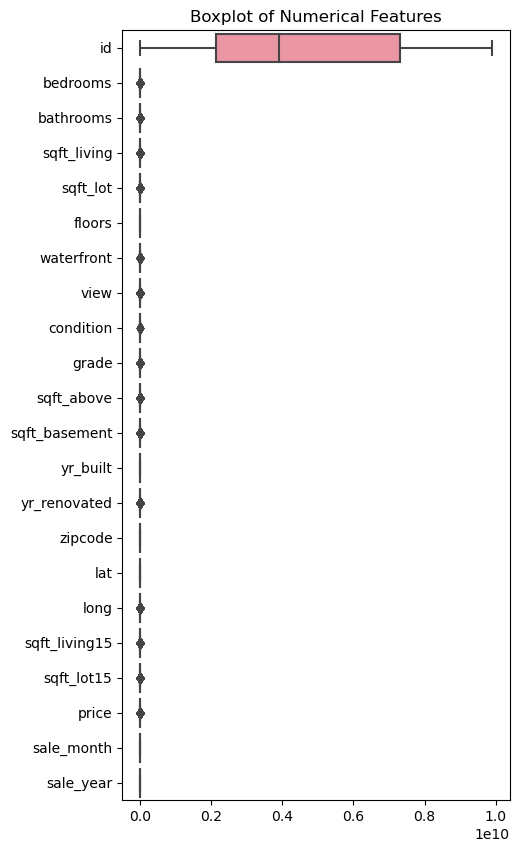

In [9]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=train_df, orient="h")
plt.title("Boxplot of Numerical Features")
plt.show()

## Box plots - of columns

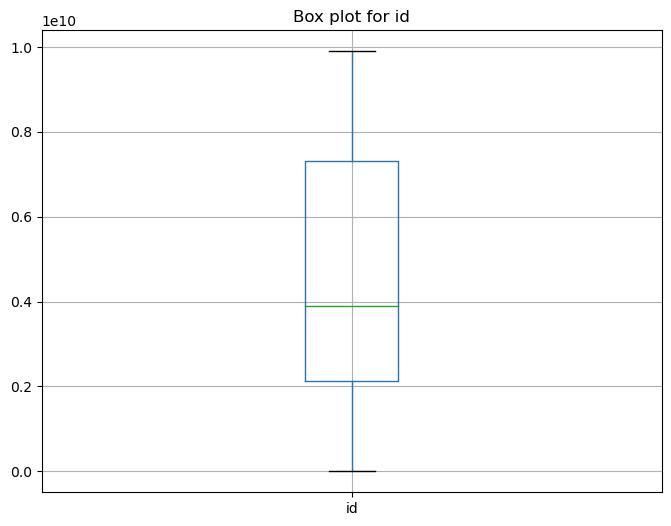

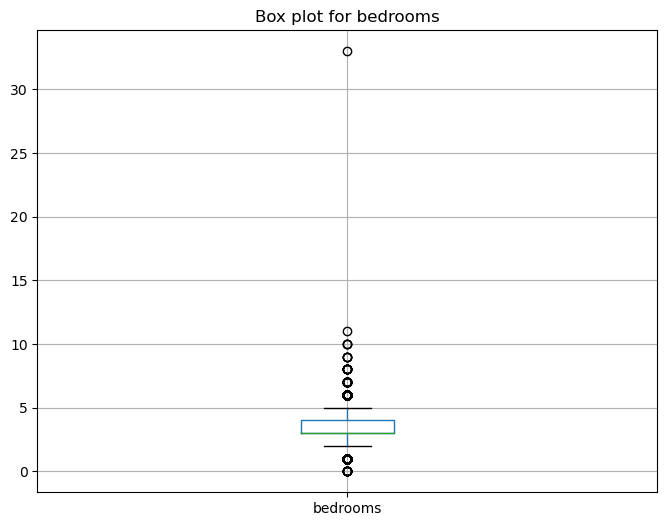

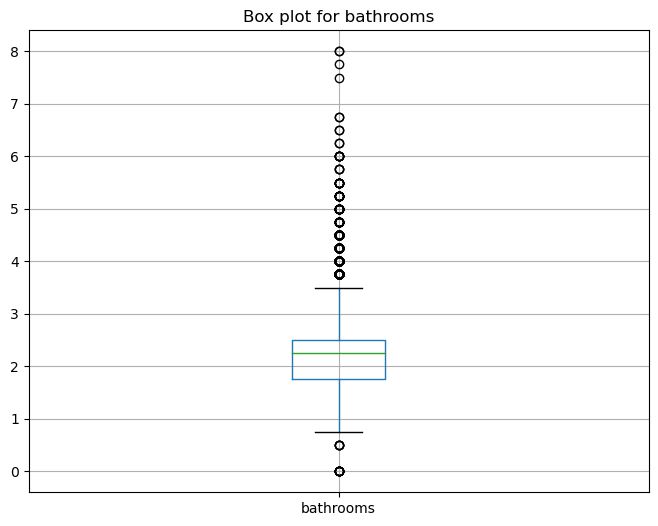

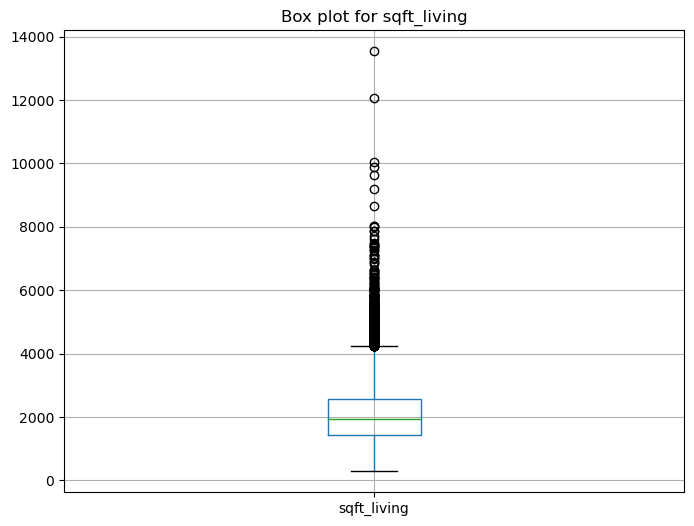

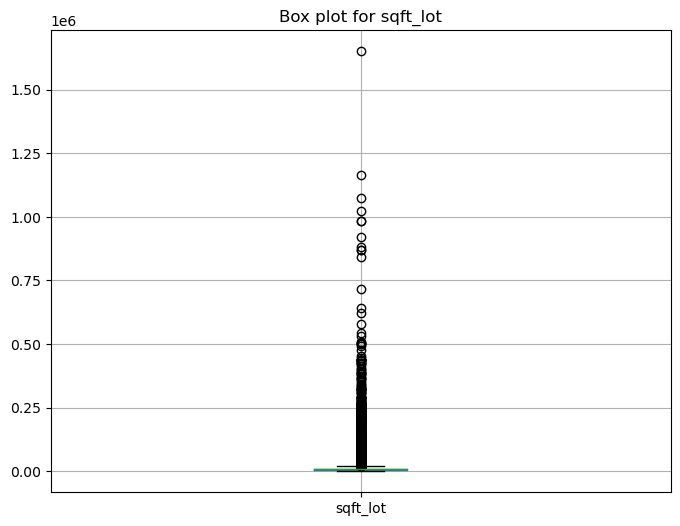

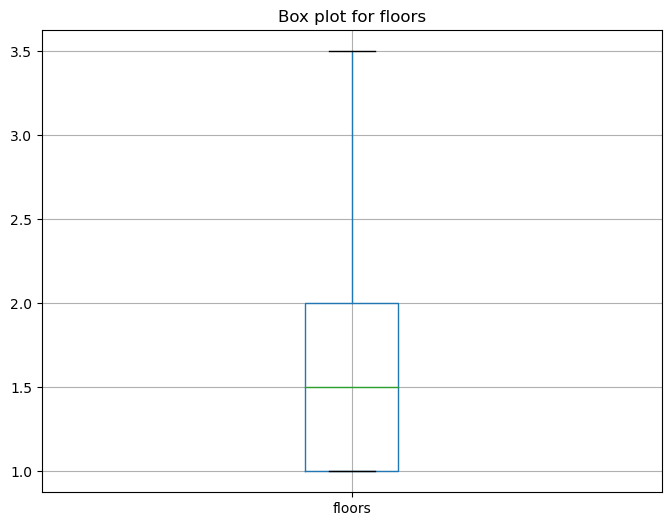

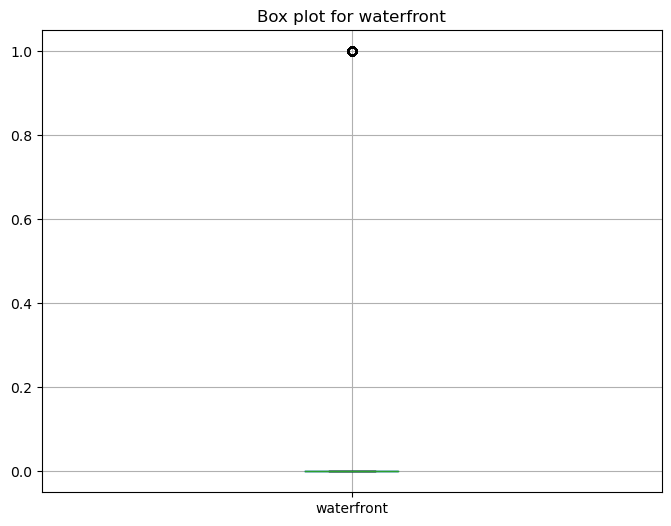

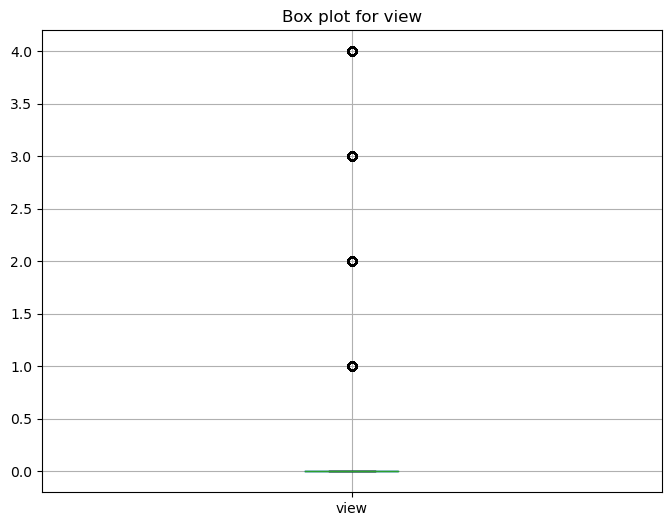

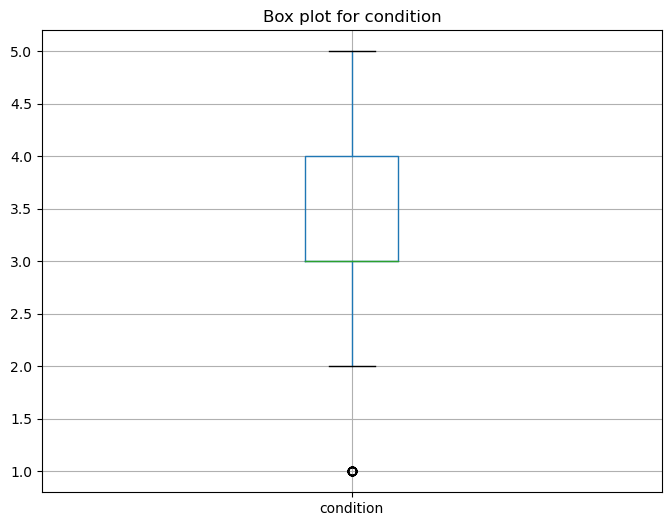

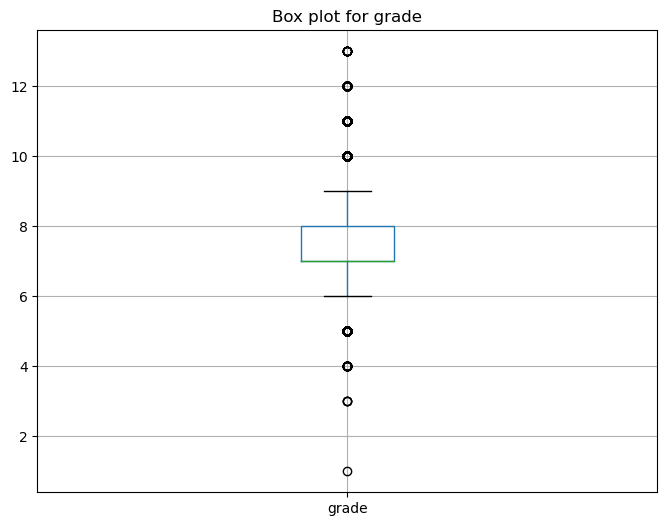

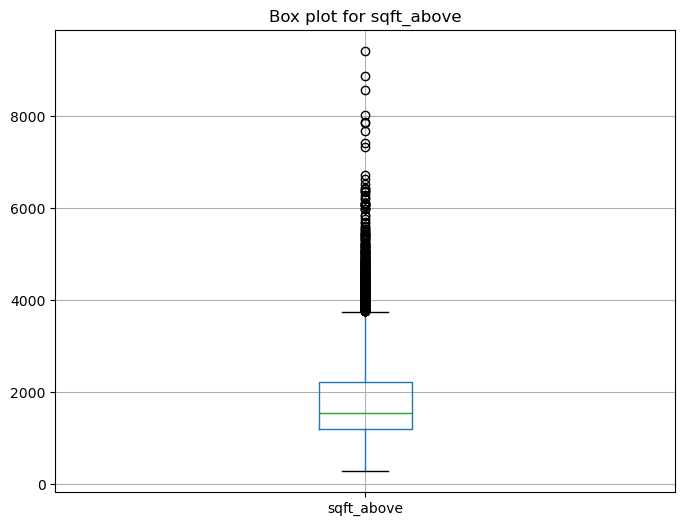

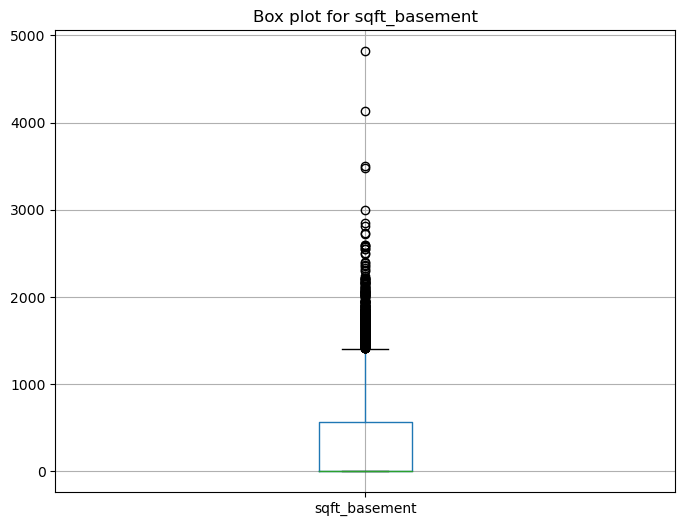

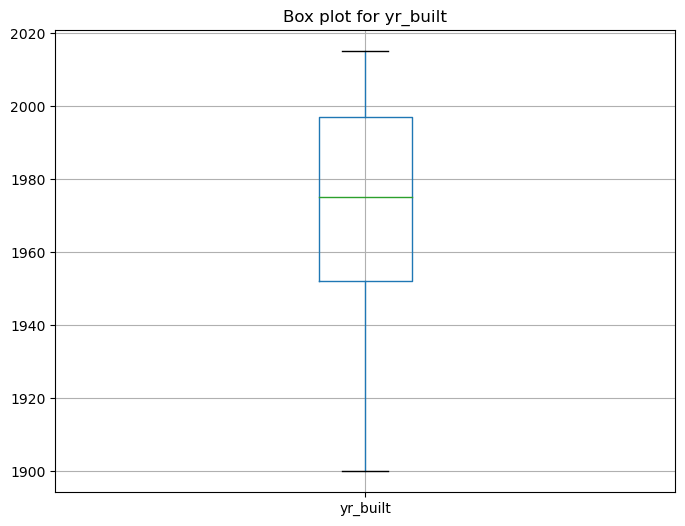

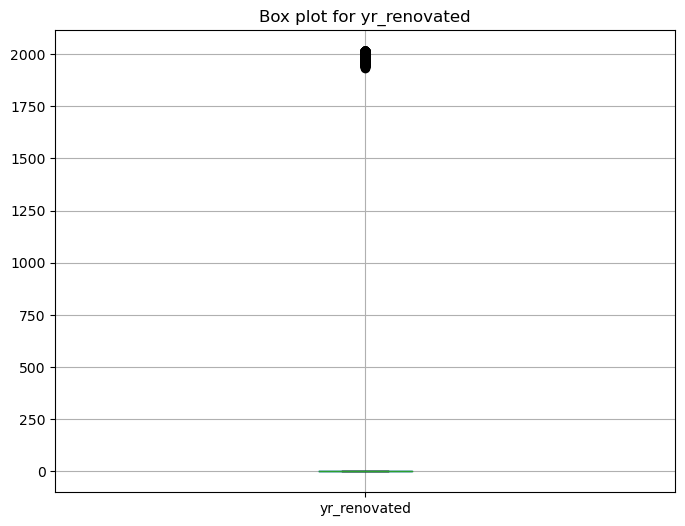

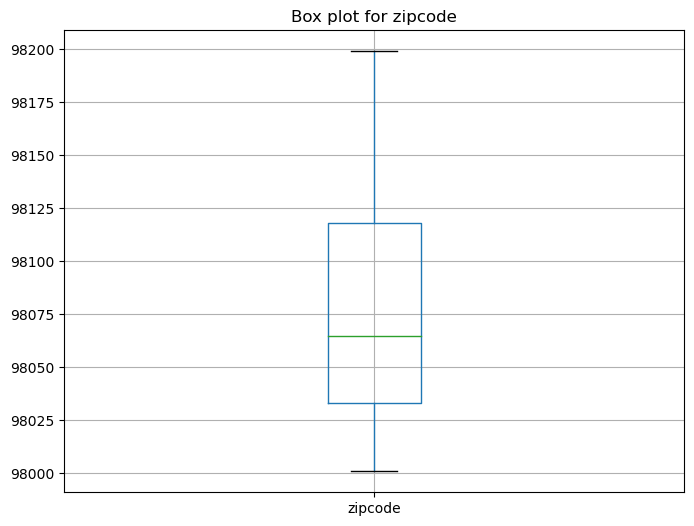

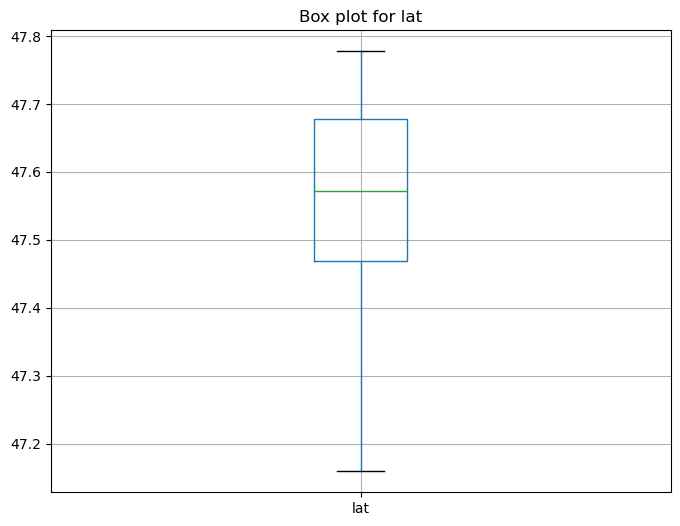

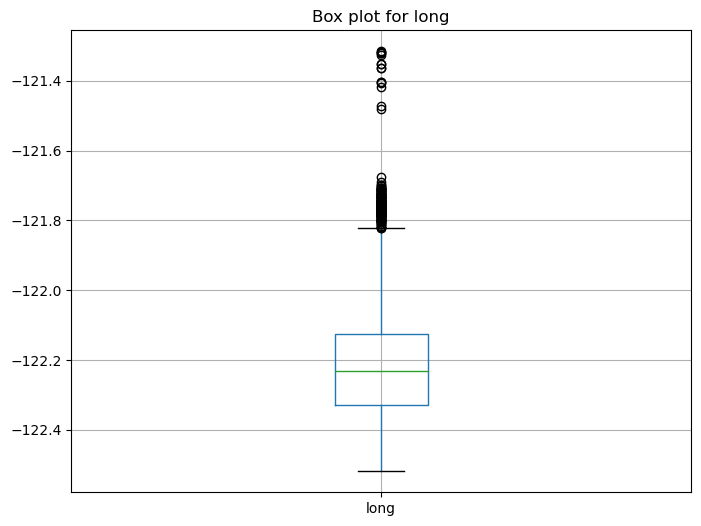

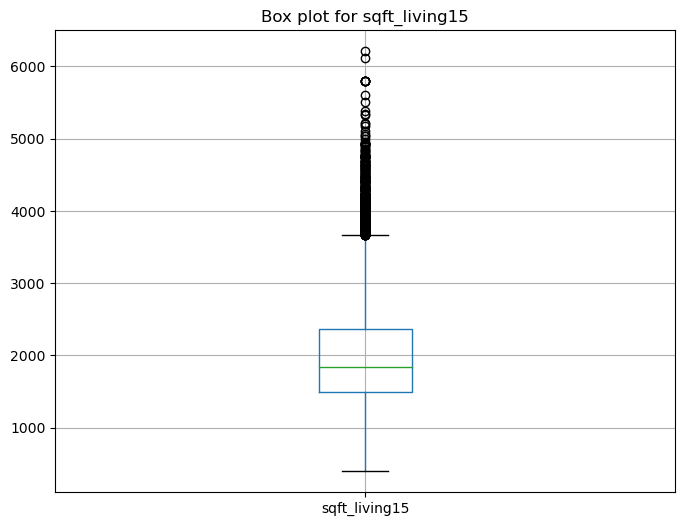

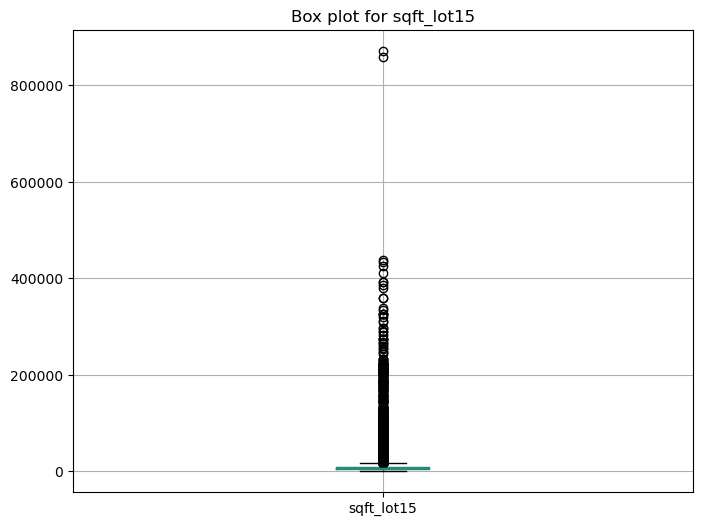

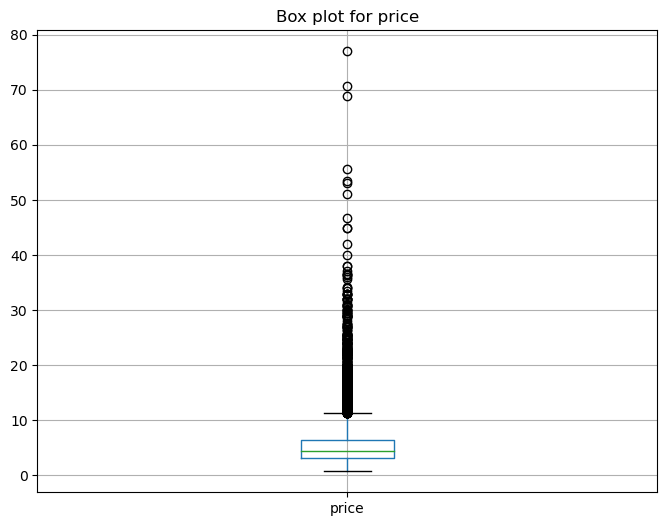

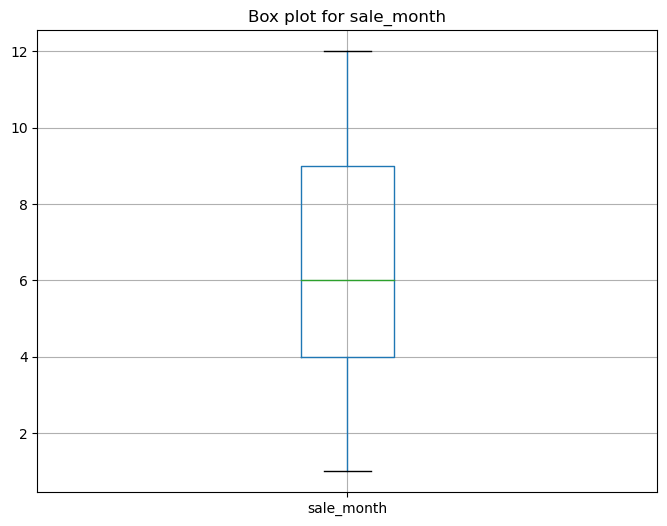

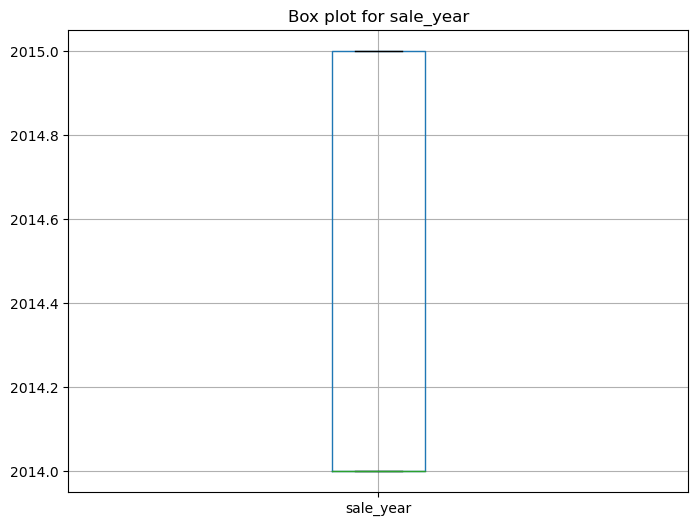

In [10]:
for column in train_df.columns:
    if column != 'date':
        # Create a box plot for the column
        plt.figure(figsize=(8, 6))
        train_df.boxplot(column=[column])
        plt.title(f'Box plot for {column}')
        plt.show()

**Observations**: 
There are several outliers in the data. The most extreme outliers are in the sqft_living15 feature, which measures the square footage of the living room. 

There are also outliers in the sqft_lot15 feature, which measures the square footage of the lot.

## Scatter plots

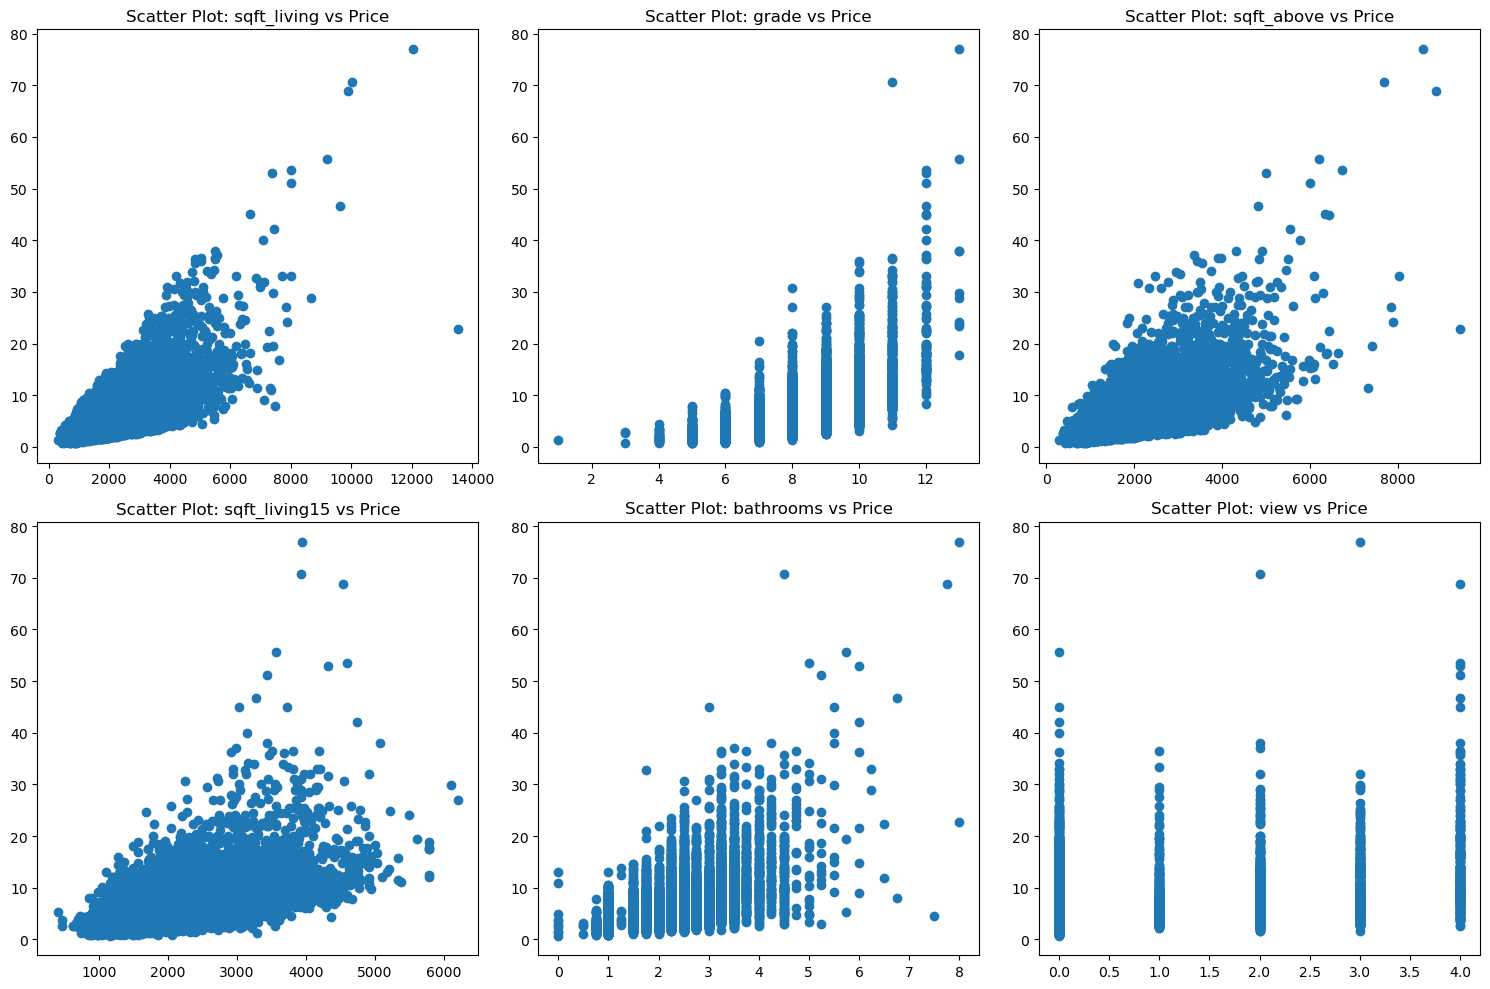

In [11]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(train_df[feature], train_df['price'])
    axes[row, col].set_title(f'Scatter Plot: {feature} vs Price')
plt.tight_layout()
plt.show()

**Observations:** 
The scatter plot of sqft_living vs price shows that there are a few outliers with very high sqft_living values. 

grade vs price shows that there are a few outliers with very high grades. 

sqft_above vs price shows that there are a few outliers with very high sqft_above values. 

sqft_living15 vs price shows that there are a few outliers with very high sqft_living15 values.

bathrooms vs price shows that there are a few outliers with very high bathroom values. 

view vs price shows that there are a few outliers with very high view values.

 ## Correlation matrix

/var/folders/c1/9b76gdzd7vddtsx835538w280000gn/T/ipykernel_12667/3076223677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


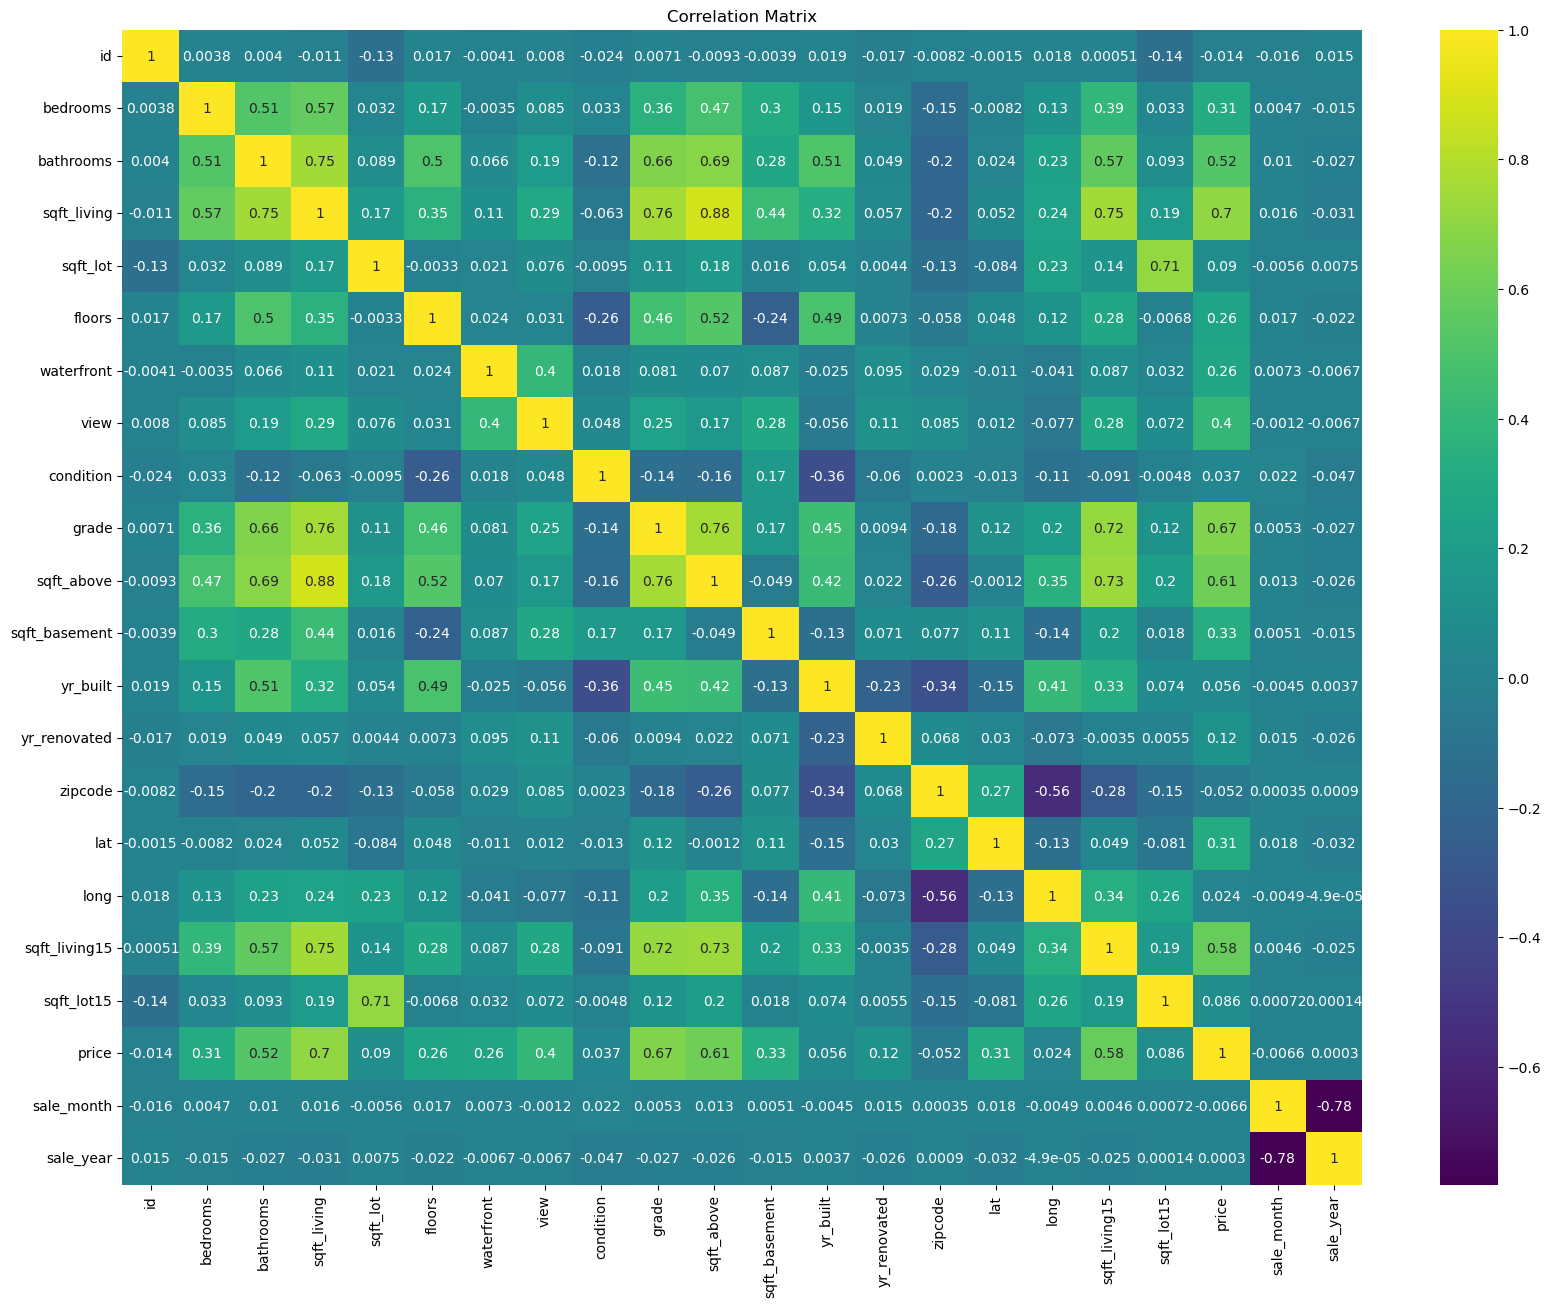

In [12]:
plt.figure(figsize=(20, 15))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

**Observations**: From above plot it can be observed that sqft_living, sqft_above, and sqft_living15, have the strongest positive correlations with the house price.

The Grade feature, also show strong positive correlations with the price, indicating homes with design quality are valuable.

Waterfront, view, condition, and zipcode have weaker or negligible correlations with the price.

## Historgram

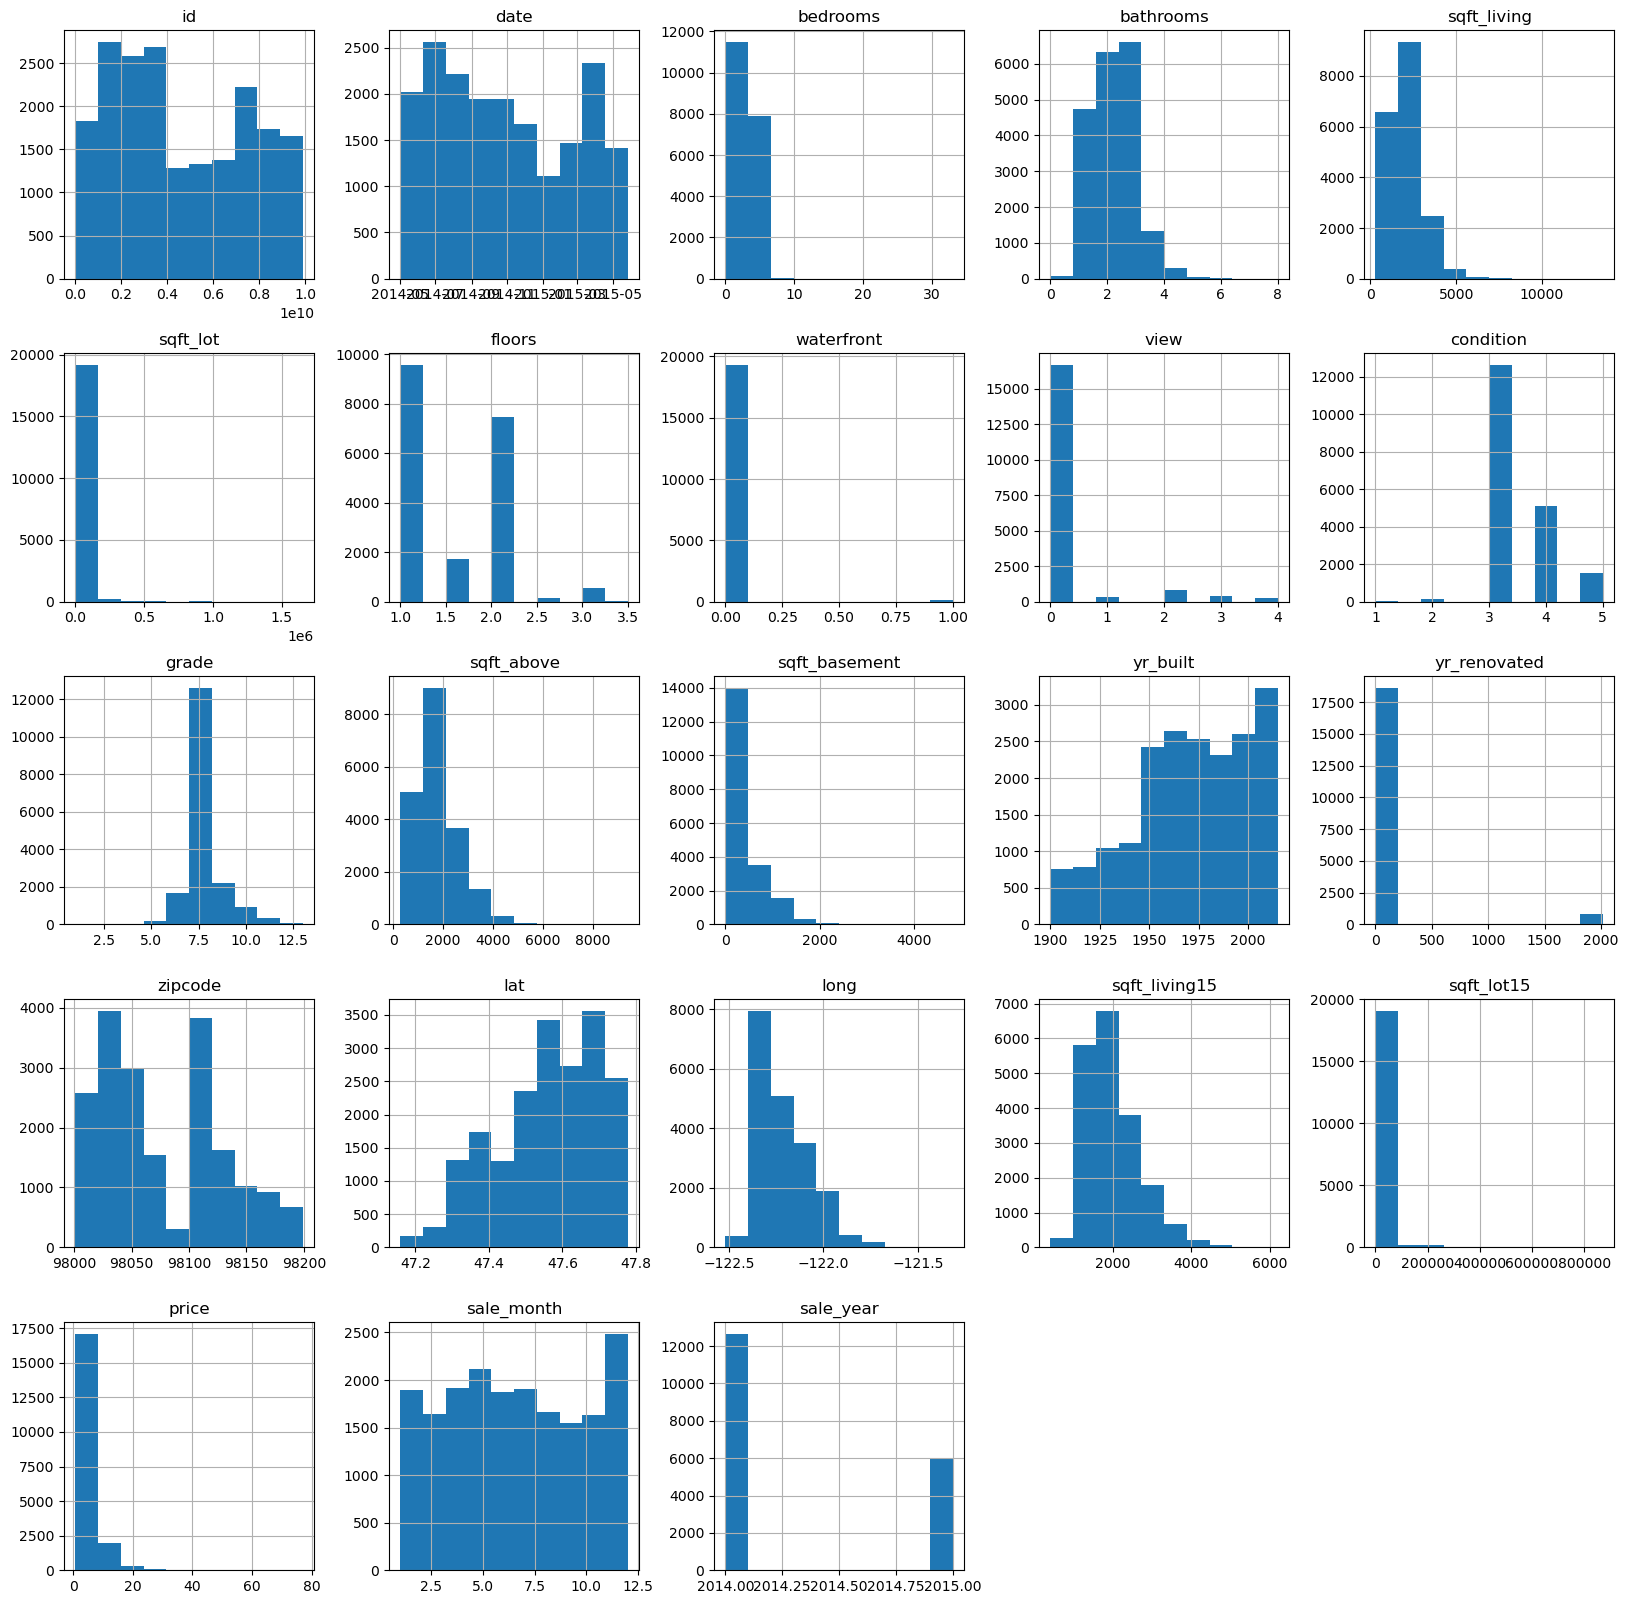

In [13]:
train_df.hist(figsize=(20,20));

## Question 2: Data pre-processing & Feature Engineering (20 points)

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data. 

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

### USING MODE IMPUTER BECAUSE  FOR MONTHS AND YEARS MEAN IS NOT MEANINGFUL

In [14]:
mode_sy = train_df['sale_year'].mode()[0]
print(mode_sy)

2014.0


In [15]:
mode_sm = train_df['sale_month'].mode()[0]
print(mode_sm)

5.0


In [16]:
train_df['sale_year'].fillna(mode_sy, inplace=True)
train_df['sale_month'].fillna(mode_sm, inplace=True)

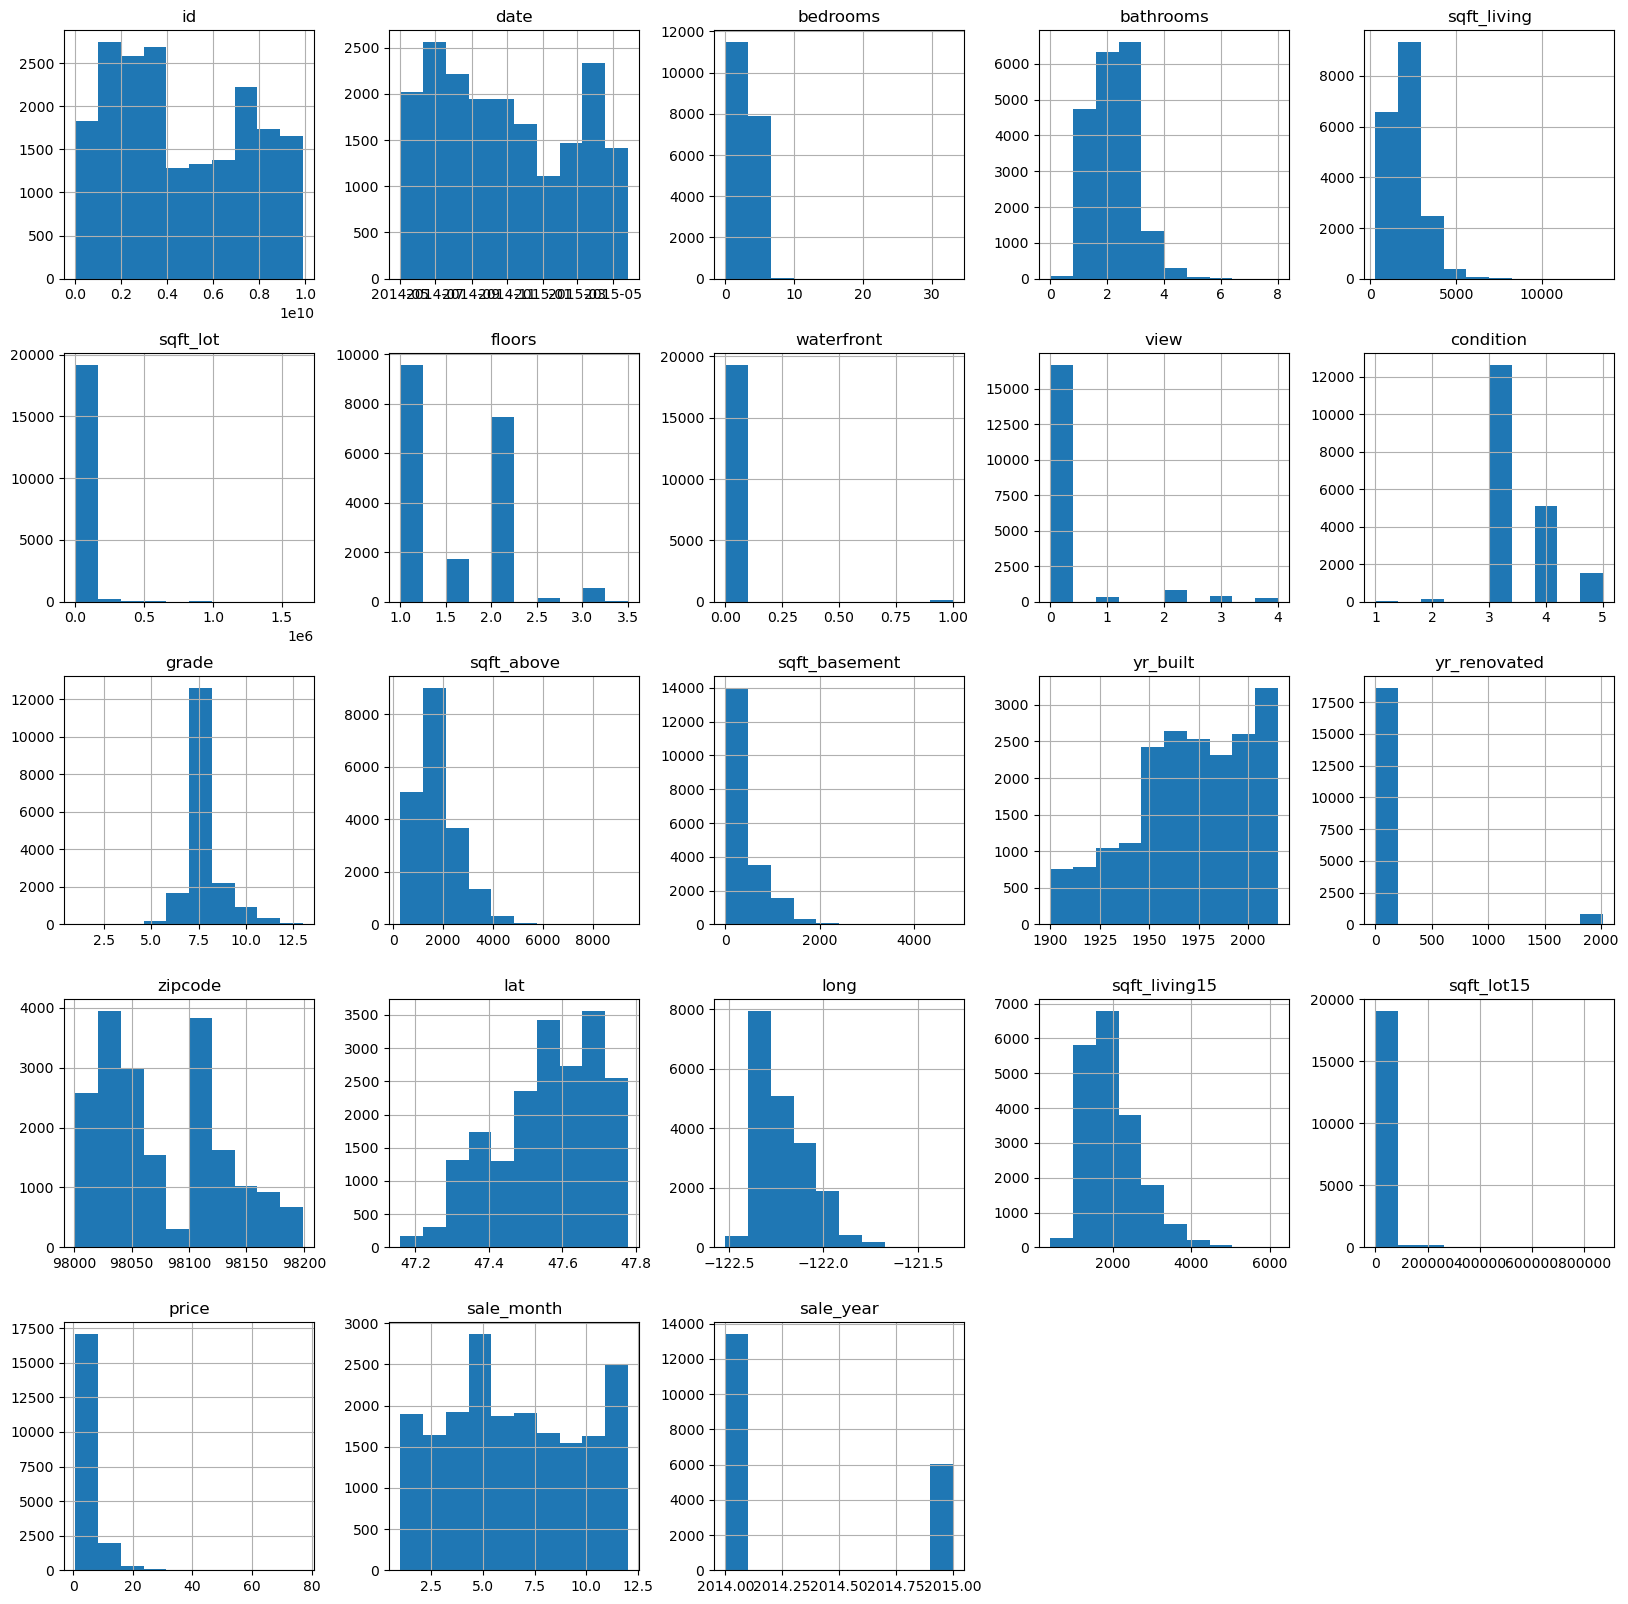

In [17]:
train_df.hist(figsize=(20,20));

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [19]:
train_df['view'] = imputer.fit_transform(train_df[['view']])

In [20]:
train_df['grade'] = imputer.fit_transform(train_df[['grade']])

In [21]:
train_df['sqft_living'] = imputer.fit_transform(train_df[['sqft_living']])

### CHECKING FOR OUTLIERS AND DELETING THEM

In [22]:
Q3 = train_df['price'].quantile(0.75)
Q1 = train_df['price'].quantile(0.25)
IQR = Q3 - Q1
print(IQR)

3.24


In [23]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-1.6500000000000004
11.31


In [24]:
#outliers
outliers = train_df[(train_df['price'] < lower_bound) | (train_df['price'] > upper_bound)]
print(outliers)

               id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
7      2525049133 2015-04-02         5       2.25       2640.0     14959   
20     3472800065 2014-08-26         4       3.00       3600.0      9687   
30     3271800870 2014-08-07         4       2.25       2020.0      5800   
64     2721600125 2015-02-05         5       2.75       2560.0      5618   
79     2424059174 2015-05-08         4       3.25       5640.0     35006   
...           ...        ...       ...        ...          ...       ...   
19256   856000985 2014-11-06         4       2.50       2910.0      7364   
19315  2025049111        NaT         3       3.50       3870.0      3819   
19329  4218400175        NaT         3       1.75       2240.0      5657   
19339  3536900110 2014-10-09         3       2.00       2310.0     21318   
19394  1329000090 2014-12-19         4       3.50       3930.0     39098   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
7         1.

In [25]:
train_df_outlier_removed = train_df.query('@lower_bound <= price <= @upper_bound')

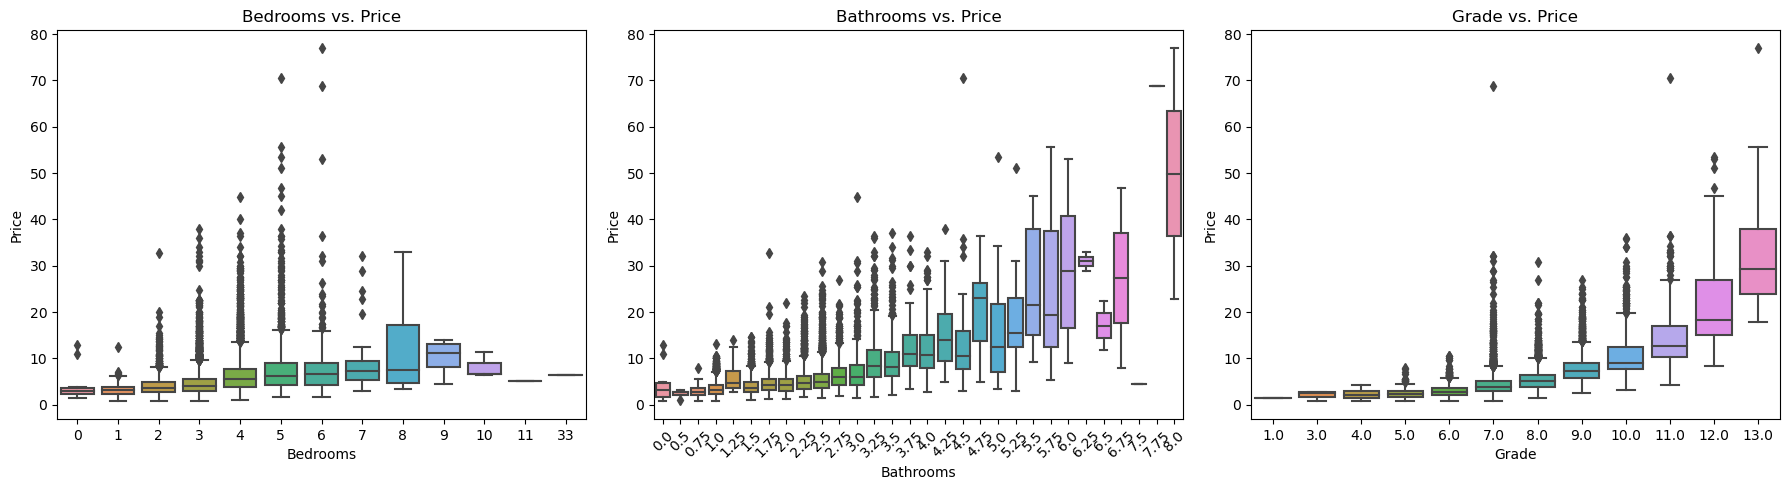

In [26]:
import seaborn as sns
# Define the columns for box plots
columns = ['bedrooms', 'bathrooms', 'grade']
plt.figure(figsize=(18, 5))
#create a box plot
for i, col in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=col, y='price', data=train_df)
    plt.title(f'{col.capitalize()} vs. Price')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')

    # Adjusting bathroom ticks for better visualization
    if col == 'bathrooms':
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:
current_yr = train_df['sale_year'].max() + 1
train_df['house_age'] = current_yr - train_df['yr_built']
print(train_df['house_age'])

0        115.0
1         38.0
2         97.0
3         25.0
4         64.0
         ...  
19446     23.0
19447     63.0
19448     13.0
19449     50.0
19450     39.0
Name: house_age, Length: 19451, dtype: float64


In [28]:
train_df['years_since_renovation'] = current_yr - train_df['yr_renovated']
train_df.loc[train_df['yr_renovated'] == 0, 'years_since_renovation'] = train_df['house_age']

In [29]:
X = train_df.drop(['price', 'id', 'date'], axis=1) 
y = train_df['price']

## Question 3 - Modeling (20 points)

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

#### Importing Libraries, Splitting train and test sets

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Trying different models

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    
}
cv_scores = {}
for name, model in models.items():
    scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(scores)
    cv_scores[name] = rmse_scores.mean()

print(cv_scores)

{'Linear Regression': 2.0716891444776, 'Decision Tree Regressor': 2.005946539404737, 'Random Forest Regressor': 1.4125677832295622}


#### Hyperparameter tuning and Model evaluation

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

In [34]:
def rmse_cv(model, X, y):
    scoring = {"rmse": "neg_root_mean_squared_error"}
    scores = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=False)
    rmse_mean = -np.mean(scores["test_rmse"])
    return rmse_mean
def print_scores(model, X_train, y_train):
    model.fit(X_train, y_train)
    rmse_train = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    print("Train RMSE:", rmse_train)
    cv_score = rmse_cv(model, X_train, y_train)
    print("5CV Score:", cv_score)
param_grids = {
    "Linear Regression": {},
    "Decision Tree Regressor": {"max_depth": [3, 5, 7, None]},
    "Random Forest Regressor": {"n_estimators": [100, 200], "max_depth": [5,None]},
}
for name, model in models.items():
    print(name + ":") 
    grid_search = GridSearchCV(model, param_grids[name], scoring='neg_root_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    print_scores(best_model, X_train, y_train)
    print()

Linear Regression:
Best Parameters: {}
Train RMSE: 2.0673285416461074
5CV Score: 2.0716891444776

Decision Tree Regressor:
Best Parameters: {'max_depth': 7}
Train RMSE: 1.5835731734916871
5CV Score: 1.9952062706587117

Random Forest Regressor:
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Train RMSE: 0.512518951651591
5CV Score: 1.4025590575492448



## Question 4 - Evaluation and Reporting (20 points)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

**Model Selection : Random Forest**

The Random Forest Regressor model has the best performance based on the 5-fold cross-validation (5CV) score of 1.4042843602225763, which is significantly lower than the 5CV scores of the Linear Regression (2.0716891444775665) and Decision Tree Regressor (1.9952062706587117) models.


The Random Forest Regressor also has the lowest train RMSE of 0.5113385260137946, indicating that it is able to fit the training data very well.


Given the superior 5CV score and the low train RMSE, the Random Forest Regressor would perform optimally on unseen data

## Question 5 - External validation (30 pt)

Now, after creating an evaluation table for all the models, pick the one that you think would give you the best results on the test data. Your predictions will be matched with the actual hidden test labels. We would use below evaluation function to grade the quality of your model.

You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

#### Load dataset

In [46]:
test_df = pd.read_csv(r'/Users/surajvamshi77/Downloads/midterm/Problem2/dataset/test.csv')

#### Data preprocessing and feature engineering

In [48]:
# Assuming 'date' is the name of your date column in the DataFrame
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y%m%dT%H%M%S', errors='coerce')

# Extract month and year into separate columns
test_df['sale_month'] = test_df['date'].dt.month
test_df['sale_year'] = test_df['date'].dt.year

In [51]:
test_df['view'] = imputer.fit_transform(test_df[['view']])

In [52]:
test_df['grade'] = imputer.fit_transform(test_df[['grade']])

In [53]:
test_df['sqft_living'] = imputer.fit_transform(test_df[['sqft_living']])

In [ ]:
test_df['sale_year'] = test_df['date'].dt.year
test_df['sale_month'] = test_df['date'].dt.month
test_df.drop('date', axis=1, inplace=True)
test_df['sale_year'].fillna(sale_year_mode, inplace=True)
test_df['sale_month'].fillna(sale_month_mode, inplace=True)

In [57]:
mode_sy = test_df['sale_year'].mode()[0]
test_df['sale_year'].fillna(mode_sy, inplace=True)

In [58]:
mode_sy = test_df['sale_month'].mode()[0]
test_df['sale_month'].fillna(mode_sy, inplace=True)

In [10]:
test_df.drop('date', axis=1, inplace=True)

In [60]:
current_yr = test_df['sale_year'].max() + 1
test_df['house_age'] = current_yr - test_df['yr_built']


In [61]:
test_df['years_since_renovation'] = current_yr - test_df['yr_renovated']
test_df.loc[test_df['yr_renovated'] == 0, 'years_since_renovation'] = test_df['house_age']

In [68]:
test_df.drop(['id'], axis=1,inplace = True)

#### Choosing Best model to predict

In [69]:
model = RandomForestRegressor(random_state=42)


In [70]:
X_test = test_df  # Remove 'id' column from test data


In [71]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
predictions = model.predict(X_test)

In [73]:
submission_df = pd.DataFrame({'price': predictions})
submission_df.to_csv('submission.csv', index=False, header=True)  # Ensure header is included

## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluation_metrics(gt,pred):
    # gt: actual labels for the test data
    # pred: student's prediction for the test data
    score = np.sqrt(mean_squared_error(gt, pred))
    return score